In [ ]:
!pip install transformers
!pip install ipywidgets
!pip install emoji
pip install --upgrade jupyter

In [ ]:
pip install pandas_profiling

# Install Package

In [1]:
#general purpose packages
import numpy as np
import pandas as pd

import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns

#data processing
import re, string


import emoji
import nltk
from collections import Counter

from sklearn import preprocessing
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split


#Naive Bayes
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.naive_bayes import MultinomialNB

#transformers
from transformers import BertTokenizerFast
from transformers import TFBertModel
from transformers import RobertaTokenizerFast
from transformers import TFRobertaModel
from transformers import TFAutoModel, AutoTokenizer

#ROS
from imblearn.over_sampling import RandomOverSampler


#keras
import tensorflow as tf
from tensorflow import keras

#metrics
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import classification_report, confusion_matrix

#ProfileReport
from pandas_profiling import ProfileReport

#goole file
# from google.colab import files

seed = 42

/var/folders/6t/smh8jz1x54qg9kcw_mdl7zdc0000gn/T/ipykernel_76959/92248991.py:50: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport


# Define fuction 

In [2]:
def conf_matrix(y, y_pred, title):
    fig, ax =plt.subplots(figsize=(5,5))
    labels=['Negative', 'Neutral', 'Positive']
    ax=sns.heatmap(confusion_matrix(y, y_pred), annot=True, cmap="Blues", fmt='g', cbar=False, annot_kws={"size":25})
    plt.title(title, fontsize=20)
    ax.xaxis.set_ticklabels(labels, fontsize=17) 
    ax.yaxis.set_ticklabels(labels, fontsize=17)
    ax.set_ylabel('Test', fontsize=20)
    ax.set_xlabel('Predicted', fontsize=20)
    plt.show()

# Loading the data

In [3]:
raw_df = pd.read_csv("/Users/apple/Desktop/combined_with_scores.csv")
raw_df

,Unnamed: 0,Comment,id,date,Pos,Neg,Neu,Car brand,sentiment_score
0,1,"I'm not sure I have ever commented on a video,...",\n @charlesconnor1737\n,3 years ago,0.207,0.070,0.723,Alfa Romeo,5
1,2,I’ve always done the cup holder test in all my...,\n @gllegacy87\n,3 years ago,0.206,0.000,0.794,Alfa Romeo,4
2,3,I absolutely love the design of the Stelvio an...,\n @driftattack11\n,4 years ago,0.133,0.136,0.731,Alfa Romeo,2
3,4,I believe the reason behind the column mounted...,\n @Black2005Lotus\n,4 years ago,0.100,0.082,0.818,Alfa Romeo,4
4,5,Finally! As a previous 4C Spider and now Giuli...,\n @DrachenBlasen\n,4 years ago,0.171,0.027,0.802,Alfa Romeo,5
...,...,...,...,...,...,...,...,...,...
10317,531,This is a woman's car. No man should buy this ...,\n @justinharrison8987\n,11 months ago,0.000,0.196,0.804,Porsche Macan,5
10318,532,Cringe.,\n @Darionn17\n,11 months ago,0.000,0.000,1.000,Porsche Macan,1
10319,533,Cringe.,\n @ec2233\n,11 months ago,0.000,0.000,1.000,Porsche Macan,1
10320,534,How I hate this „women have to be in everythin...,\n @sedieflow1132\n,11 months ago,0.125,0.174,0.701,Porsche Macan,1


# Delete Duplicate tweets ??

In [13]:
# Assuming you have loaded the dataframe as `raw_df`

initial_rows = len(raw_df)  # Count the rows before removing duplicates

raw_df.drop_duplicates(subset='Comment', inplace=True)

final_rows = len(raw_df)  # Count the rows after removing duplicates

# Calculate the number and percentage of rows removed
rows_removed = initial_rows - final_rows
percentage_removed = (rows_removed / initial_rows) * 100

print(f"{rows_removed} rows ({percentage_removed:.2f}%) have been removed.")


0 rows (0.00%) have been removed.


In [14]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9994 entries, 0 to 10321
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       9994 non-null   int64  
 1   Comment          9993 non-null   object 
 2   id               9994 non-null   object 
 3   date             9994 non-null   object 
 4   Pos              9994 non-null   float64
 5   Neg              9994 non-null   float64
 6   Neu              9994 non-null   float64
 7   Car brand        9994 non-null   object 
 8   sentiment_score  9994 non-null   int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 780.8+ KB


# Tweets count by date

In [8]:
tweets_per_day = raw_df['date'].value_counts().sort_index().reset_index(name='counts')

/var/folders/6t/smh8jz1x54qg9kcw_mdl7zdc0000gn/T/ipykernel_76959/1346119044.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  ax = sns.barplot(x='index', y='counts', data=tweets_per_day,edgecolor = 'black',ci=False, palette='Blues_r')


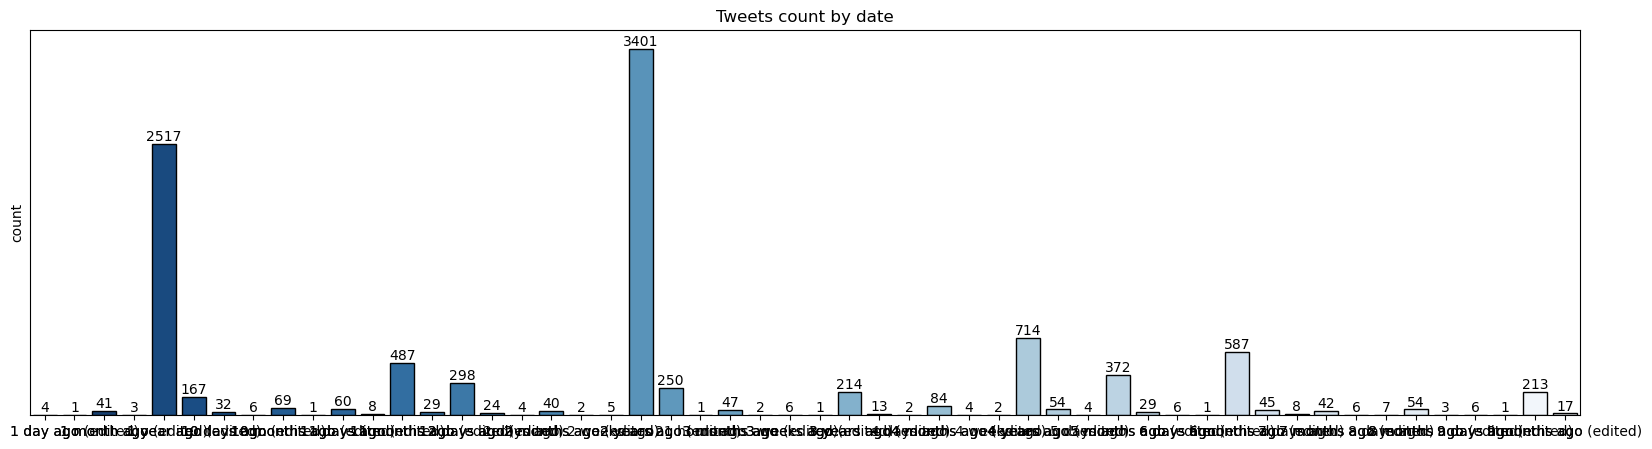

In [9]:
plt.figure(figsize=(20,5))
ax = sns.barplot(x='index', y='counts', data=tweets_per_day,edgecolor = 'black',ci=False, palette='Blues_r')
plt.title('Tweets count by date')
plt.yticks([])
ax.bar_label(ax.containers[0])
plt.ylabel('count')
plt.xlabel('')
plt.show()

In [ ]:
# import pandas as pd
# from pandas_profiling import ProfileReport
# raw_df = pd.read_csv('/Users/apple/Desktop/combined.csv')

# profile = ProfileReport(raw_df, title="Pandas Profiling Report")
# profile.to_notebook_iframe()

raw_df 沒處理
df 包含comment sentiment (train_data)
test_df
clean_df df

# 舊的Classify the sentiment label from vader into 123

In [ ]:
# MAX_LEN = 512


# data_array = raw_df.values.tolist().copy()
# res_array = []

# for item in data_array:
#   rang = (0, 1, 2)
#   if not isinstance(item[1], str): continue
#   if len(item[1]) > MAX_LEN//2: continue
#   rate = item[-3:]
#   # if rate[0] not in rang or rate[1] not in rang or rate[2] not in rang: continue
#   tmp = 0
#   if rate[0] > rate[1] and rate[0] > rate[2]: tmp = 0
#   elif rate[1] > rate[0] and rate[1] > rate[2]: tmp = 1
#   else: tmp = 2
#   res_array.append([item[1], tmp])

# Train-Test split

# 舊的

In [ ]:
# test_num = len(res_array) * 3 // 10
# df = pd.DataFrame(res_array[:len(res_array)-test_num], columns = ['comment','sentiment_score'])
# test_df = pd.DataFrame(res_array[-test_num:], columns = ['comment','sentiment_score'])

# df = df.dropna()
# test_df = test_df.dropna()

In [ ]:
# # 确定数据集的大小
# total_len = len(res_array)

# # 确定测试集的大小
# test_num = int(total_len * 0.3)

# # 使用数据创建训练集和测试集的DataFrame
# df = pd.DataFrame(res_array[:-test_num], columns=['comment', 'sentiment_score'])
# test_df = pd.DataFrame(res_array[-test_num:], columns=['comment', 'sentiment_score'])

# # 移除含有NaN值的行
# df = df.dropna()
# test_df = test_df.dropna()

# 新方法

In [15]:
from sklearn.model_selection import train_test_split
import pandas as pd

# 假设raw_df已经被定义并包含'Comment'和'sentiment_score'列

# 仅保留'Comment'和'sentiment_score'两列
raw_df = raw_df[['Comment', 'sentiment_score']]

# 使用stratify参数确保在train和test中的'sentiment_score'平均分布
train_df, test_df = train_test_split(raw_df, test_size=0.3, stratify=raw_df['sentiment_score'], random_state=42)

# 如果你需要，你还可以去掉含有NaN的行
train_df = train_df.dropna(subset=['Comment', 'sentiment_score'])
test_df = test_df.dropna(subset=['Comment', 'sentiment_score'])
test_df

,Comment,sentiment_score
7133,الحلم,5
713,1:56 on loop,1
6722,So whats popin pops out on dashbord,1
7288,Wish to have this one someday,5
7185,Mat is the best car reviewer on here!,5
...,...,...
9609,No ACC as standard where as even the smallest ...,2
3677,Yianni and Mat video is always a winner.,5
7146,Why people say it ma-kan (eat) instead of ma-c...,1
5708,looks like a cheap suv from kia.,2


In [16]:
Counter(train_df['sentiment_score'].values)

Counter({4: 777, 1: 1720, 5: 2401, 2: 733, 3: 1363})

# Tweets Deep Cleaning (pre-procesisng)


In [17]:
clean_df = train_df[['Comment','sentiment_score']]
clean_df

,Comment,sentiment_score
2166,"Matt, the front isofix is the one you use when...",4
2514,Did he ever said right go ahead and buy for au...,1
3016,The Porsche is beautiful. I think it's in a cl...,4
5448,My dream Italian SUV! Wonderful job Joe.,5
9032,Ford puma on steroids,1
...,...,...
4365,Intresting on the gearbox not auto up shifting...,3
7162,Werder Bremen,5
7269,Imagine mat joining the grand tour,5
10284,"Nah, she isn’t as good as Rory",3


# FUNCTIONS TO CLEAN THE TWEETS

In [18]:
##CUSTOM DEFINED FUNCTIONS TO CLEAN THE TWEETS

#Clean emojis from text
# def strip_emoji(text):
#     return re.sub(emoji.get_emoji_regexp(), r"", text) #remove emoji

#Remove punctuations, links, mentions and \r\n new line characters
def strip_all_entities(text): 
    text = text.replace('\r', '').replace('\n', ' ').replace('\n', ' ').lower() #remove \n and \r and lowercase
    text = re.sub(r"(?:\@|https?\://)\S+", "", text) #remove links and mentions
    text = re.sub(r'[^\x00-\x7f]',r'', text) #remove non utf8/ascii characters such as '\x9a\x91\x97\x9a\x97'
    banned_list= string.punctuation + 'Ã'+'±'+'ã'+'¼'+'â'+'»'+'§'
    table = str.maketrans('', '', banned_list)
    text = text.translate(table)
    return text

#clean hashtags at the end of the sentence, and keep those in the middle of the sentence by removing just the # symbol
def clean_hashtags(tweet):
    new_tweet = " ".join(word.strip() for word in re.split('#(?!(?:hashtag)\b)[\w-]+(?=(?:\s+#[\w-]+)*\s*$)', tweet)) #remove last hashtags
    new_tweet2 = " ".join(word.strip() for word in re.split('#|_', new_tweet)) #remove hashtags symbol from words in the middle of the sentence
    return new_tweet2

#Filter special characters such as & and $ present in some words
def filter_chars(a):
    sent = []
    for word in a.split(' '):
        if ('$' in word) | ('&' in word):
            sent.append('')
        else:
            sent.append(word)
    return ' '.join(sent)

def remove_mult_spaces(text): # remove multiple spaces
    return re.sub("\s\s+" , " ", text)

In [19]:
texts_new = []
for t in clean_df.Comment:
    texts_new.append(remove_mult_spaces(filter_chars(clean_hashtags(strip_all_entities(t)))))

In [20]:
texts_new_test = []
for t in test_df.Comment:
    texts_new_test.append(remove_mult_spaces(filter_chars(clean_hashtags(strip_all_entities(t)))))

In [21]:
len(texts_new)

6994

In [22]:
clean_df['Comment'] = texts_new
test_df['Comment'] = texts_new_test

In [23]:
test_df

,Comment,sentiment_score
7133,,5
713,156 on loop,1
6722,so whats popin pops out on dashbord,1
7288,wish to have this one someday,5
7185,mat is the best car reviewer on here,5
...,...,...
9609,no acc as standard where as even the smallest ...,2
3677,yianni and mat video is always a winner,5
7146,why people say it makan eat instead of machan ...,1
5708,looks like a cheap suv from kia,2


# 

# check removed too much text

In clean_df, there are 297 entries with less than 10 characters.


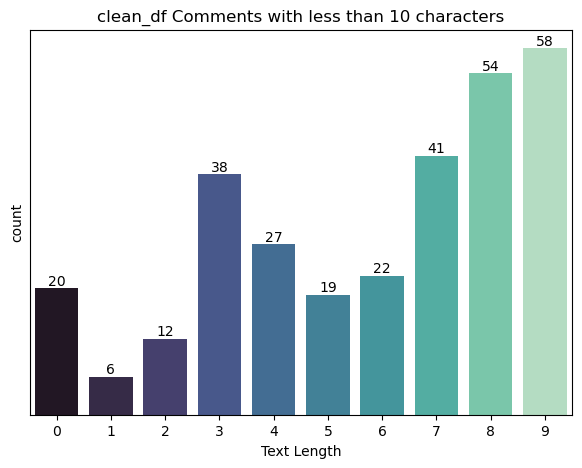

In test_df, there are 129 entries with less than 10 characters.


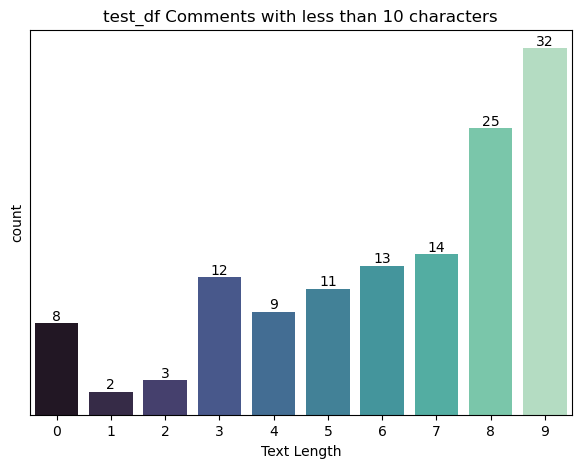

In [29]:
def print_and_plot(df, df_name):
    # Assuming the column name is 'Comments'
    df['text_len'] = df['Comment'].apply(lambda x: len(str(x)))
    short_texts_count = len(df[df['text_len'] < 10])

    # Print the result
    print(f"In {df_name}, there are {short_texts_count} entries with less than 10 characters.")

    # Visualization
    plt.figure(figsize=(7,5))
    ax = sns.countplot(x='text_len', data=df[df['text_len'] < 10], palette='mako')
    plt.title(f'{df_name} Comments with less than 10 characters')
    plt.yticks([])
    ax.bar_label(ax.containers[0])
    plt.ylabel('count')
    plt.xlabel('Text Length')
    plt.show()

# Call the function for both DataFrames
print_and_plot(clean_df, "clean_df")
print_and_plot(test_df, "test_df")


This means that some tweets contained only mentions, hashtags and links, which have been removed. We will drop these empty tweets and also those with less than 5 words.

In [33]:
# Store the original number of rows
original_clean_df_count = len(clean_df)
original_test_df_count = len(test_df)

def drop_short_and_empty_tweets(df):
    # Drop NaN or empty values
    df.dropna(subset=['Comment'], inplace=True)

    # Drop rows with less than 5 words
    df = df[df['Comment'].apply(lambda x: len(str(x).split()) >= 5)]
    return df

clean_df = drop_short_and_empty_tweets(clean_df)
test_df = drop_short_and_empty_tweets(test_df)

# Calculate and print the percentage drop for clean_df
percentage_drop_clean = (original_clean_df_count - len(clean_df)) / original_clean_df_count * 100
print(f"The percentage of rows dropped from clean_df: {percentage_drop_clean:.2f}%")

# Calculate and print the percentage drop for test_df
percentage_drop_test = (original_test_df_count - len(test_df)) / original_test_df_count * 100
print(f"The percentage of rows dropped from test_df: {percentage_drop_test:.2f}%")


The percentage of rows dropped from clean_df: 0.00%
The percentage of rows dropped from test_df: 0.00%


/var/folders/6t/smh8jz1x54qg9kcw_mdl7zdc0000gn/T/ipykernel_76959/2021965080.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(subset=['Comment'], inplace=True)
/var/folders/6t/smh8jz1x54qg9kcw_mdl7zdc0000gn/T/ipykernel_76959/2021965080.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(subset=['Comment'], inplace=True)


In [36]:
clean_df

,Comment,sentiment_score,text_len
2166,matt the front isofix is the one you use when ...,4,131
2514,did he ever said right go ahead and buy for audi,1,48
3016,the porsche is beautiful i think its in a clas...,4,161
5448,my dream italian suv wonderful job joe,5,38
5032,haha its the getting tossed around while going...,2,111
...,...,...,...
4954,never seen torque measured in kw before should...,3,93
4365,intresting on the gearbox not auto up shifting...,3,117
7269,imagine mat joining the grand tour,5,34
10284,nah she isnt as good as rory,3,28


# Training data deeper cleaning

In [34]:
tokenizer = BertTokenizerFast.from_pretrained('bert-base-uncased')

In [37]:
token_lens = []

for txt in clean_df['Comment'].values:
    tokens = tokenizer.encode(txt, max_length=512, truncation=True)
    token_lens.append(len(tokens))
    
max_len=np.max(token_lens)

In [38]:
print(f"MAX TOKENIZED SENTENCE LENGTH: {max_len}")

MAX TOKENIZED SENTENCE LENGTH: 335


# Test data deeper cleaning

In [39]:
token_lens_test = []

for txt in test_df['Comment'].values:
    tokens = tokenizer.encode(txt, max_length=512, truncation=True)
    token_lens_test.append(len(tokens))
    
max_len=np.max(token_lens_test)

In [40]:
print(f"MAX TOKENIZED SENTENCE LENGTH: {max_len}")

MAX TOKENIZED SENTENCE LENGTH: 343


perform a further cleaning checking the tokenizer version of the sentences.

# Sentiment column analysis 

In [41]:
clean_df['sentiment_score'].value_counts()

5    1782
1    1449
3    1210
2     678
4     665
Name: sentiment_score, dtype: int64

# ?

In [42]:
# 定义要替换的值
replace_values = {1: 0, 2: 0, 3: 1, 4: 2, 5: 2}

# 使用replace函数应用这些替换
clean_df['sentiment_score'] = clean_df['sentiment_score'].replace(replace_values)
test_df['sentiment_score'] = test_df['sentiment_score'].replace(replace_values)

In [43]:
test_df

,Comment,sentiment_score,text_len
6722,so whats popin pops out on dashbord,0,35
7288,wish to have this one someday,2,29
7185,mat is the best car reviewer on here,2,36
5258,the blonde hair says my fame has brought me a ...,2,140
672,okay i want this now in red er i mean rosso co...,1,57
...,...,...,...
9913,it was fun having you both on,2,29
9609,no acc as standard where as even the smallest ...,0,85
3677,yianni and mat video is always a winner,2,39
7146,why people say it makan eat instead of machan ...,0,128


In [44]:
clean_df['sentiment_score'].value_counts()

2    2447
0    2127
1    1210
Name: sentiment_score, dtype: int64

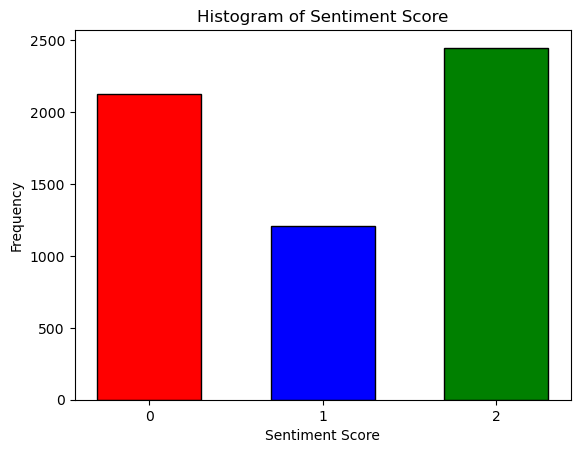

In [45]:
# Assuming clean_df is defined somewhere before this code

# Ensure 'sentiment_score' contains only 0, 1, or 2
clean_df = clean_df[clean_df['sentiment_score'].isin([0, 1, 2])]

# Get counts for each sentiment score
counts = clean_df['sentiment_score'].value_counts()

# Specify colors for each score
colors = {0: 'red', 1: 'blue', 2: 'green'}

# Plot histogram with spacing between bars
plt.bar(counts.index, counts.values, color=[colors[i] for i in counts.index], edgecolor='black', width=0.6)

plt.xticks([0, 1, 2])
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.title('Histogram of Sentiment Score')
plt.show()

# ****

# Train-Validation split

In [55]:
X = clean_df['Comment'].values
y = clean_df['sentiment_score'].values
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.1, stratify=y, random_state=seed)

X_test = test_df['Comment'].values
y_test = test_df['sentiment_score'].values

# Oversampling training data

In [78]:
ros = RandomOverSampler()
X_train_resampled, y_train_resampled = ros.fit_resample(X_train.reshape(-1, 1), y_train);
X_train_resampled = [x[0] for x in X_train_resampled]

In [85]:
import numpy as np

# Display value counts for y_train
print("Value counts for y_train:")
unique_values_train, counts_train = np.unique(y_train, return_counts=True)
for value, count in zip(unique_values_train, counts_train):
    print(f"Value: {value}, Count: {count}")
print()

# Display value counts for y_train_resampled
print("Value counts for y_train_resampled:")
unique_values_resampled, counts_resampled = np.unique(y_train_resampled, return_counts=True)
for value, count in zip(unique_values_resampled, counts_resampled):
    print(f"Value: {value}, Count: {count}")


Value counts for y_train:
Value: 0, Count: 1914
Value: 1, Count: 1089
Value: 2, Count: 2202

Value counts for y_train_resampled:
Value: 0, Count: 2202
Value: 1, Count: 2202
Value: 2, Count: 2202


# Baseline model: Naive Bayes Classifier

In [58]:
# Label Encoding y
le = LabelEncoder()
y_train_le = le.fit_transform(y_train_resampled)
y_valid_le = le.transform(y_valid)
y_test_le = le.transform(y_test)

# Count Vectorization and TF-IDF Transformation
clf = CountVectorizer()
X_train_cv = clf.fit_transform(X_train_resampled)
X_valid_cv = clf.transform(X_valid)
X_test_cv = clf.transform(X_test)

tf_transformer = TfidfTransformer(use_idf=True).fit(X_train_cv)
X_train_tf = tf_transformer.transform(X_train_cv)
X_valid_tf = tf_transformer.transform(X_valid_cv)
X_test_tf = tf_transformer.transform(X_test_cv)

# Naive Bayes Classifier
nb_clf = MultinomialNB()
nb_clf.fit(X_train_tf, y_train_le)
nb_pred = nb_clf.predict(X_test_tf)

In [59]:
nb_pred = nb_clf.predict(X_test_tf)

In [60]:
print('\tClassification Report for Naive Bayes:\n\n',classification_report(y_test_le,nb_pred, target_names=['Negative', 'Neutral', 'Positive']))

	Classification Report for Naive Bayes:

               precision    recall  f1-score   support

    Negative       0.68      0.57      0.62       927
     Neutral       0.37      0.57      0.45       507
    Positive       0.72      0.64      0.68      1068

    accuracy                           0.60      2502
   macro avg       0.59      0.59      0.58      2502
weighted avg       0.64      0.60      0.61      2502



# One hot encoding for Bert and Roberta

In [86]:
y_train_oh = y_train.copy()
y_valid_oh = y_valid.copy()
y_test_oh = y_test.copy()

In [87]:
ohe = preprocessing.OneHotEncoder()
y_train = ohe.fit_transform(np.array(y_train_resampled).reshape(-1, 1)).toarray()
y_valid = ohe.fit_transform(np.array(y_valid).reshape(-1, 1)).toarray()
y_test = ohe.fit_transform(np.array(y_test).reshape(-1, 1)).toarray()

### gbt

In [52]:
#  ohe = preprocessing.OneHotEncoder()
#  y_train = ohe.fit_transform(np.array(y_train).reshape(-1, 1)).toarray()

#  # Note the use of transform() instead of fit_transform()

#  y_valid = ohe.transform(np.array(y_valid).reshape(-1, 1)).toarray()
#  y_test = ohe.transform(np.array(y_test).reshape(-1, 1)).toarray()


In [88]:
print(f"TRAINING DATA: {X_train.shape[0]}\nVALIDATION DATA: {X_valid.shape[0]}\nTESTING DATA: {X_test.shape[0]}" )


TRAINING DATA: 5205
VALIDATION DATA: 579
TESTING DATA: 2502


In [62]:
len(y_train_resampled)

6606

In [63]:
print(np.unique(y_train))
print(y_train)

[0 1 2]
[2 0 1 ... 2 1 2]


The F1 score is around 70% for the more populated classes (Negative and Positive emotions), and lower for the Neutral class (F1=0.53).
In particular, the overall accuracy is 70%.

# BERT Sentiment Analysis

In [64]:
 tokenizer = BertTokenizerFast.from_pretrained('bert-base-uncased')

In [90]:
 MAX_LEN = 512

In [91]:
def tokenize(data,max_len = MAX_LEN) :
     input_ids = []
     attention_masks = []
     for i in range(len(data)):
         encoded = tokenizer.encode_plus(
             data[i],
             add_special_tokens=True,
             max_length=MAX_LEN,
             padding='max_length',
             return_attention_mask=True
         )
         input_ids.append(encoded['input_ids'])
         attention_masks.append(encoded['attention_mask'])
     return np.array(input_ids),np.array(attention_masks)

In [92]:
train_input_ids, train_attention_masks = tokenize(X_train_resampled, MAX_LEN)
val_input_ids, val_attention_masks = tokenize(X_valid, MAX_LEN)
test_input_ids, test_attention_masks = tokenize(X_test, MAX_LEN)

# BERT modeling

In [69]:
bert_model = TFBertModel.from_pretrained('bert-base-uncased')

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.bias', 'cls.seq_relationship.bias']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions w

In [93]:
def create_model(bert_model, max_len=MAX_LEN):

    ##params###
    lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=0.01,
    decay_steps=10000,
    decay_rate=0.9)

    opt = tf.keras.optimizers.Adam(learning_rate=lr_schedule)
    loss = tf.keras.losses.CategoricalCrossentropy()
    accuracy = tf.keras.metrics.CategoricalAccuracy()


    input_ids = tf.keras.Input(shape=(max_len,),dtype='int32')

    attention_masks = tf.keras.Input(shape=(max_len,),dtype='int32')

    embeddings = bert_model([input_ids,attention_masks])[1]

    output = tf.keras.layers.Dense(3, activation="softmax")(embeddings)


    model = tf.keras.models.Model(inputs = [input_ids,attention_masks], outputs = output)

    model.compile(opt, loss=loss, metrics=accuracy)


    return model

In [94]:
model = create_model(bert_model, MAX_LEN)
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_3 (InputLayer)        [(None, 512)]                0         []                            
                                                                                                  
 input_4 (InputLayer)        [(None, 512)]                0         []                            
                                                                                                  
 tf_bert_model (TFBertModel  multiple                     1094822   ['input_3[0][0]',             
 )                                                        40         'input_4[0][0]']             
                                                                                                  
 dense_1 (Dense)             (None, 3)                    2307      ['tf_bert_model[1][1]'] 

In [72]:
import sys
np.set_printoptions(threshold=sys.maxsize)

# input 問題

In [96]:
print(train_input_ids.shape)
print(train_attention_masks.shape)
print(y_train.shape)
print(val_input_ids.shape)
print(val_attention_masks.shape)
print(y_valid.shape)


(6606, 512)
(6606, 512)
(6606, 3)
(579, 512)
(579, 512)
(579, 3)


In [ ]:
history_bert = model.fit([train_input_ids,train_attention_masks], y_train, validation_data =
                         ([val_input_ids,val_attention_masks], y_valid), epochs=1, batch_size=128)

10/52 [====>.........................] - ETA: 1:47:14 - loss: 5.4484 - categorical_accuracy: 0.3500

In [ ]:
result_bert = model.predict([test_input_ids,test_attention_masks])

# BERT results

In [ ]:
y_pred_bert =  np.zeros_like(result_bert)
y_pred_bert[np.arange(len(y_pred_bert)), result_bert.argmax(1)] = 1

In [ ]:
conf_matrix(y_test.argmax(1), y_pred_bert.argmax(1),'BERT Sentiment Analysis\nConfusion Matrix')

In [ ]:
print('\tClassification Report for BERT:\n\n',classification_report(y_test,y_pred_bert, target_names=['Negative', 'Neutral', 'Positive']))

# RoBERTa Sentiment Analysis

In [ ]:
tokenizer_roberta = RobertaTokenizerFast.from_pretrained("roberta-base")

In [ ]:
token_lens = []

for txt in X_train:
    tokens = tokenizer_roberta.encode(txt, max_length=512, truncation=True)
    token_lens.append(len(tokens))
max_length=np.max(token_lens)
max_length

In [ ]:
MAX_LEN=128

In [ ]:
def tokenize_roberta(data,max_len=MAX_LEN) :
    input_ids = []
    attention_masks = []
    for i in range(len(data)):
        encoded = tokenizer_roberta.encode_plus(
            data[i],
            add_special_tokens=True,
            max_length=max_len,
            padding='max_length',
            return_attention_mask=True
        )
        input_ids.append(encoded['input_ids'])
        attention_masks.append(encoded['attention_mask'])
    return np.array(input_ids),np.array(attention_masks)

In [ ]:
train_input_ids, train_attention_masks = tokenize_roberta(X_train, MAX_LEN)
val_input_ids, val_attention_masks = tokenize_roberta(X_valid, MAX_LEN)
test_input_ids, test_attention_masks = tokenize_roberta(X_test, MAX_LEN)

# RoBERTa modeling

In [ ]:
def create_model(bert_model, max_len=MAX_LEN):
    
    opt = tf.keras.optimizers.legacy.Adam(learning_rate=0.001, decay=1e6)
    loss = tf.keras.losses.CategoricalCrossentropy()
    accuracy = tf.keras.metrics.CategoricalAccuracy()

    input_ids = tf.keras.Input(shape=(max_len,),dtype='int32')
    attention_masks = tf.keras.Input(shape=(max_len,),dtype='int32')
    output = bert_model([input_ids,attention_masks])
    output = output[1]
    output = tf.keras.layers.Dense(3, activation=tf.nn.softmax)(output)
    model = tf.keras.models.Model(inputs = [input_ids,attention_masks],outputs = output)
    model.compile(opt, loss=loss, metrics=accuracy)
    return model

In [ ]:
roberta_model = TFRobertaModel.from_pretrained('roberta-base')

In [ ]:
model = create_model(roberta_model, MAX_LEN)
model.summary()

In [ ]:
history_2 = model.fit([train_input_ids,train_attention_masks], y_train, validation_data=([val_input_ids,val_attention_masks], y_valid), epochs=4, batch_size=30)

# RoBERTa results

In [ ]:
result_roberta = model.predict([test_input_ids,test_attention_masks])

In [ ]:
y_pred_roberta =  np.zeros_like(result_roberta)
y_pred_roberta[np.arange(len(y_pred_roberta)), result_roberta.argmax(1)] = 1

In [ ]:
conf_matrix(y_test.argmax(1),y_pred_roberta.argmax(1),'RoBERTa Sentiment Analysis\nConfusion Matrix')

# Classification Matrix Comparison

In [ ]:
fig, ax = plt.subplots(1,2,figsize=(18,9))

labels = ['Negative', 'Neutral', 'Positive']
plt.suptitle('Sentiment Analysis Comparison\n Confusion Matrix', fontsize=20)


sns.heatmap(confusion_matrix(y_test.argmax(1),y_pred_bert.argmax(1)), annot=True, cmap="Blues", fmt='g', cbar=False, ax=ax[0], annot_kws={"size":25})

ax[0].set_title('BERT Classifier', fontsize=20)
ax[0].set_yticklabels(labels, fontsize=17);
ax[0].set_xticklabels(labels, fontsize=17);
ax[0].set_ylabel('Test', fontsize=20)
ax[0].set_xlabel('Predicted', fontsize=20)

sns.heatmap(confusion_matrix(y_test.argmax(1),y_pred_roberta.argmax(1)), annot=True, cmap="Blues", fmt='g', cbar=False, ax=ax[1], annot_kws={"size":25})
ax[1].set_title('RoBERTa Classifier', fontsize=20)
ax[1].set_yticklabels(labels, fontsize=17);
ax[1].set_xticklabels(labels, fontsize=17);
ax[1].set_ylabel('Test', fontsize=20)
ax[1].set_xlabel('Predicted', fontsize=20)


plt.show()